# Finance Loan Approval Prediction

Finance company deals in all loans. The customer first applies for a home loan after that company validates the customer's eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically. Here they have provided a partial data set.

In [736]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [737]:
#Load both the training and testing data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [738]:
#Print the first 5 rows of the training data
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [739]:
train_df.shape

(614, 13)

In [740]:
loan_id = test_df['Loan_ID']

There are 614 rows and 13 columns in the training data

In [741]:
test_df.shape

(367, 12)

There are 367 rows and 12 columns in the testing data

In [742]:
#datatype of columns
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [743]:
#Check for missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [744]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [745]:
train_df['Dependents'] = train_df['Dependents'].replace('3+', 3)
test_df['Dependents'] = test_df['Dependents'].replace('3+', 3)

In [746]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [747]:
train_df['Dependents'] = train_df['Dependents'].astype('float')
test_df['Dependents'] = test_df['Dependents'].astype('float')

In [748]:
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [749]:
train_df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [750]:
train_df['Gender'].replace(np.nan,'Male',inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_11520\102917684.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Gender'].replace(np.nan,'Male',inplace=True)


In [751]:
train_df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [752]:
train_df['Married'].replace(np.nan,'Yes',inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_11520\1009699705.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Married'].replace(np.nan,'Yes',inplace=True)


In [753]:
avg_dependents = train_df['Dependents'].mean()
train_df['Dependents'].replace(np.nan,avg_dependents,inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_11520\2161034667.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Dependents'].replace(np.nan,avg_dependents,inplace=True)


In [754]:
train_df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [755]:
train_df['Self_Employed'].replace(np.nan,'No',inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_11520\3548038971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Self_Employed'].replace(np.nan,'No',inplace=True)


In [756]:
avg_amount = train_df['LoanAmount'].mean()
train_df['LoanAmount'].replace(np.nan,avg_amount,inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_11520\1916494455.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['LoanAmount'].replace(np.nan,avg_amount,inplace=True)


In [757]:
avg_term = train_df['Loan_Amount_Term'].mean()
train_df['Loan_Amount_Term'].replace(np.nan,avg_term,inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_11520\437099386.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Loan_Amount_Term'].replace(np.nan,avg_term,inplace=True)


In [758]:
avg_history = train_df['Credit_History'].mean()
train_df['Credit_History'].replace(np.nan,avg_history,inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_11520\1714408726.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Credit_History'].replace(np.nan,avg_history,inplace=True)


In [759]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [760]:
train_df['Dependents'] = train_df['Dependents'].astype(int)

In [761]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [762]:
gender_rate = train_df.groupby('Gender')['Loan_Status'].value_counts(normalize=True).mul(100).reset_index()

In [763]:
gender_rate

,Gender,Loan_Status,proportion
0,Female,Y,66.964286
1,Female,N,33.035714
2,Male,Y,69.123506
3,Male,N,30.876494


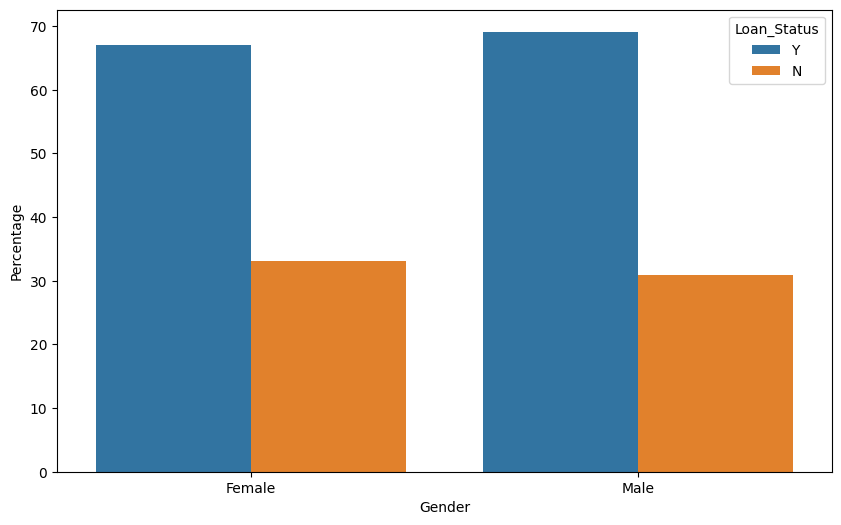

In [764]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gender',y='proportion',hue='Loan_Status',data=gender_rate)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

##### So from the above chart we can say that
- 66.96% of females have been granted loan by the bank and 33.03% have been rejected
- 69.12% of males have been granted loan by the bank and 30.87% have been rejected
##### So we can conclude from this that more loans have been granted to males than females

In [765]:
married_rate = train_df.groupby('Married')['Loan_Status'].value_counts(normalize=True).mul(100).reset_index()

In [766]:
married_rate

,Married,Loan_Status,proportion
0,No,Y,62.910798
1,No,N,37.089202
2,Yes,Y,71.820449
3,Yes,N,28.179551


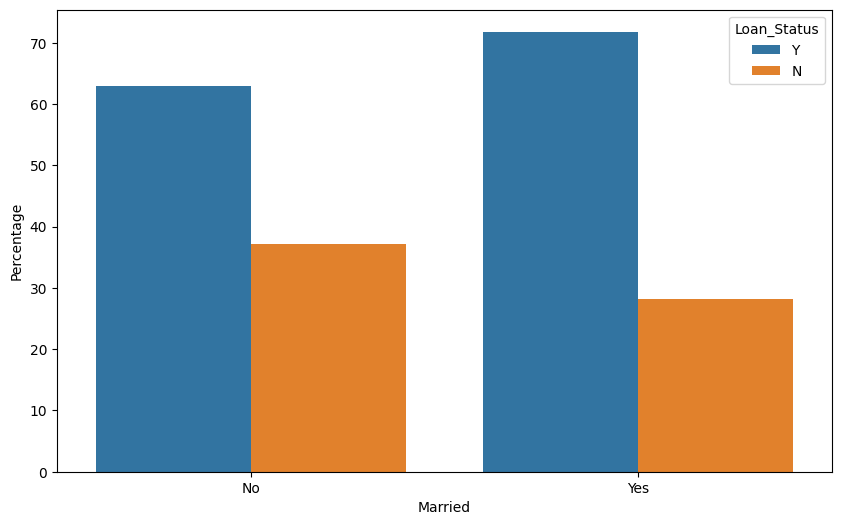

In [767]:
plt.figure(figsize=(10,6))
sns.barplot(x='Married',y='proportion',hue='Loan_Status',data=married_rate)
plt.xlabel('Married')
plt.ylabel('Percentage')
plt.show()

##### So from the above chart we can say that
- 62.91% of unmarried customers have been granted loan by the bank and 37.08% have been rejected
- 71.82% of married customers have been granted loan by the bank and 28.17% have been rejected
##### So we can conclude from this that more loans have been granted to married customers than unmarried customers

In [768]:
education_rate = train_df.groupby('Education')['Loan_Status'].value_counts(normalize=True).mul(100).reset_index()

In [769]:
education_rate

,Education,Loan_Status,proportion
0,Graduate,Y,70.833333
1,Graduate,N,29.166667
2,Not Graduate,Y,61.194030
3,Not Graduate,N,38.805970


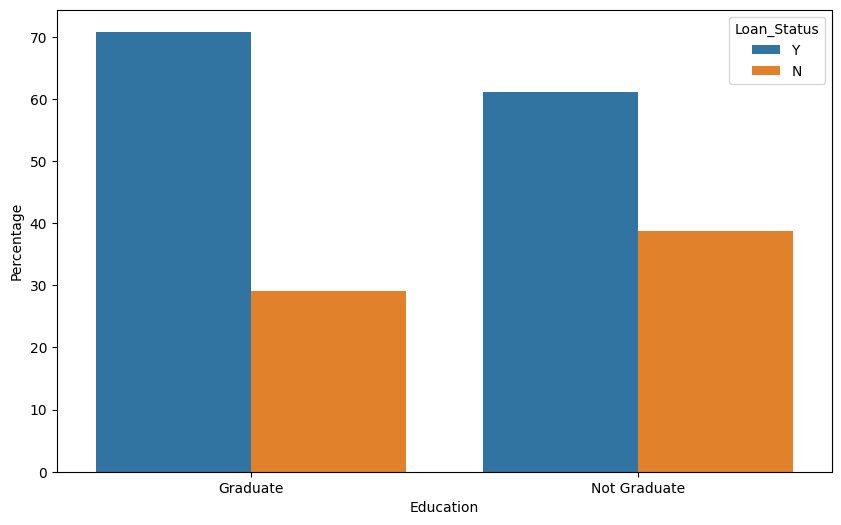

In [770]:
plt.figure(figsize=(10,6))
sns.barplot(x='Education',y='proportion',hue='Loan_Status',data=education_rate)
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.show()

##### So from the above chart we can say that
- 70.83% of graduates have been granted loan by the bank and 29.16% have been rejected
- 61.19% of non-graduates have been granted loan by the bank and 38.80% have been rejected
##### So we can conclude from this that more loans have been granted to graduates than non-graduates

In [771]:
self_employment_rate = train_df.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=True).mul(100).reset_index()

In [772]:
self_employment_rate

,Self_Employed,Loan_Status,proportion
0,No,Y,68.796992
1,No,N,31.203008
2,Yes,Y,68.292683
3,Yes,N,31.707317


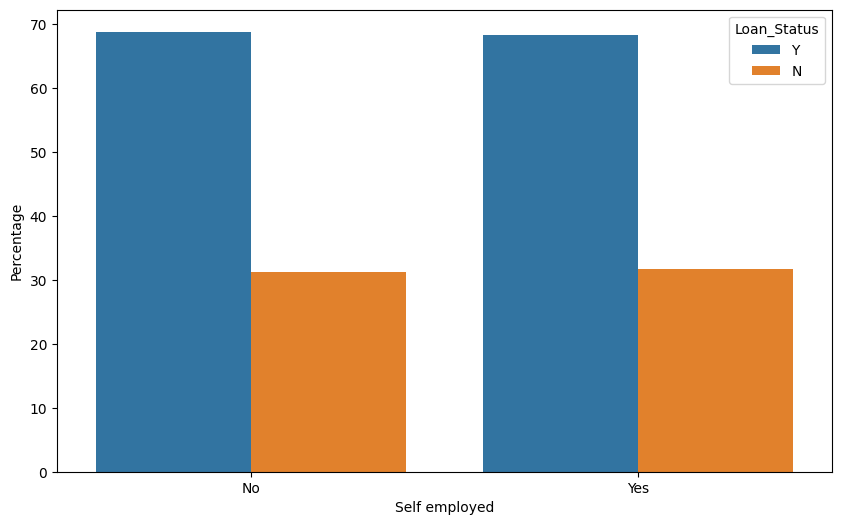

In [773]:
plt.figure(figsize=(10,6))
sns.barplot(x='Self_Employed',y='proportion',hue='Loan_Status',data=self_employment_rate)
plt.xlabel('Self employed')
plt.ylabel('Percentage')
plt.show()

##### So from the above chart we can say that
- 68.79% of non self-employed have been granted loan by the bank and 31.20% have been rejected
- 68.28% of self-employed have been granted loan by the bank and 31.70% have been rejected
##### So we can conclude from this that almost equal % of loans have been granted to both self-employed and non self-employed customers

In [774]:
area_rate = train_df.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True).mul(100).reset_index()

In [775]:
area_rate

,Property_Area,Loan_Status,proportion
0,Rural,Y,61.452514
1,Rural,N,38.547486
2,Semiurban,Y,76.824034
3,Semiurban,N,23.175966
4,Urban,Y,65.841584
5,Urban,N,34.158416


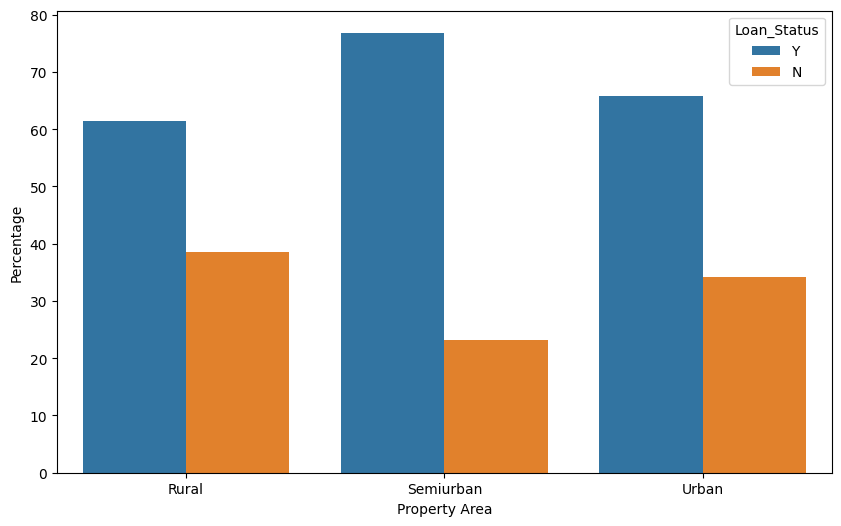

In [776]:
plt.figure(figsize=(10,6))
sns.barplot(x='Property_Area',y='proportion',hue='Loan_Status',data=area_rate)
plt.xlabel('Property Area')
plt.ylabel('Percentage')
plt.show()

##### So from the above chart we can say that
- 61.45% of customers living in rural areas have been granted loan by the bank and 38.54% have been rejected
- 76.82% of customers living in semi-urban have been granted loan by the bank and 23.17% have been rejected
- 65.84% of customers living in urban have been granted loan by the bank and 34.15% have been rejected
##### So we can conclude from this that more loans have been granted to customers living in semi-urban areas followed by urban and rural areas

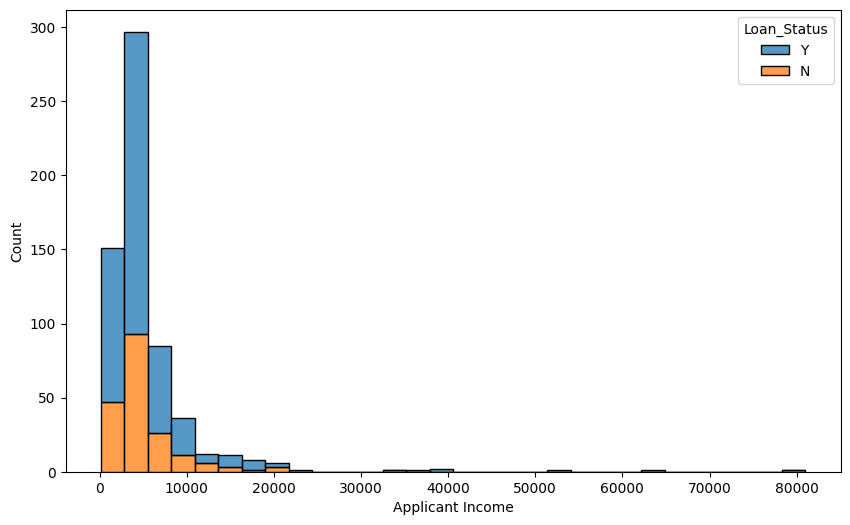

In [777]:
plt.figure(figsize=(10,6))
sns.histplot(x='ApplicantIncome',hue='Loan_Status',multiple='stack',bins=30,data=train_df)
plt.xlabel('Applicant Income')
plt.show()

##### From the chart we can say that
- As income increases (10K+), the number of applicants decreases
- Most applicants have incomes between 0–10,000.
- Loan approvals are higher in this range

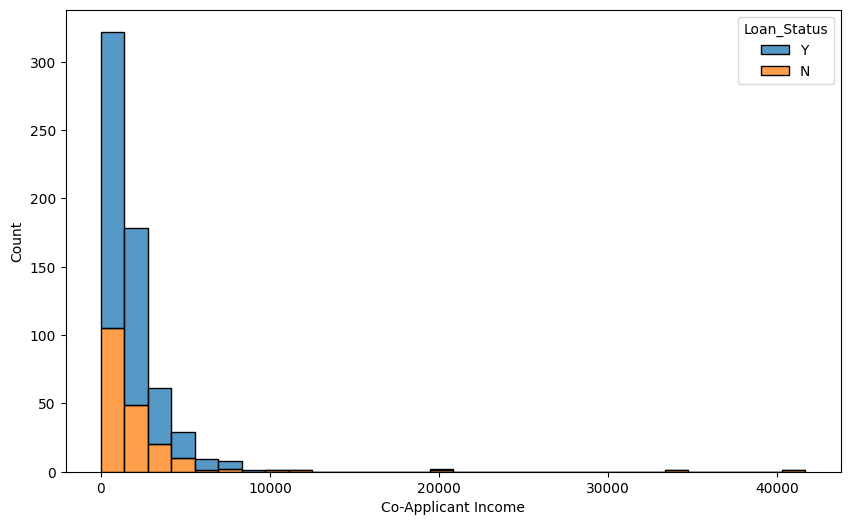

In [778]:
plt.figure(figsize=(10,6))
sns.histplot(x='CoapplicantIncome',hue='Loan_Status',multiple='stack',bins=30,data=train_df)
plt.xlabel('Co-Applicant Income')
plt.show()

##### From the chart we can say that
- As income increases (10K+), the number of co-applicants decreases
- Most co-applicants have incomes between 0–10,000.
- Loan approvals are higher in this range

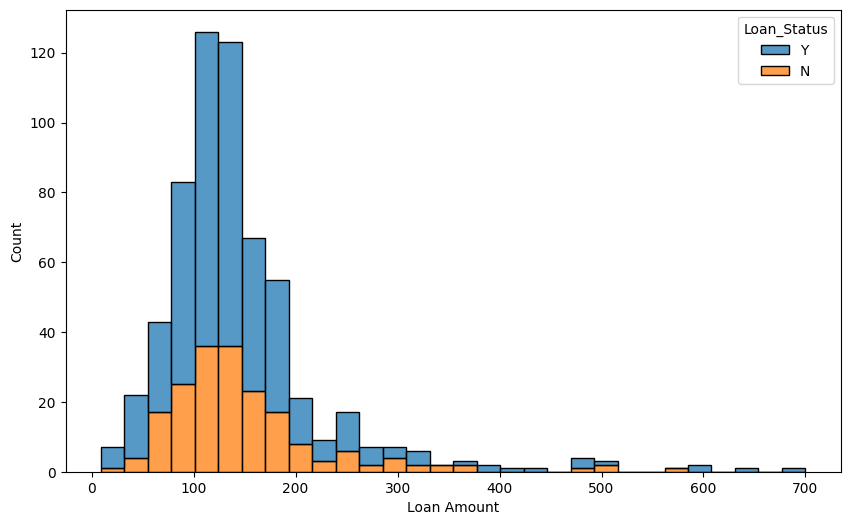

In [779]:
plt.figure(figsize=(10,6))
sns.histplot(x='LoanAmount',hue='Loan_Status',multiple='stack',bins=30,data=train_df)
plt.xlabel('Loan Amount')
plt.show()

##### From the chart we can say that
1. Most loans are between 50–200 (thousands)
    - The peak is around 100–150.
    - This makes sense because most applicants in the dataset request moderate loan amounts.
2. Loan approvals (blue, Y) dominate across ranges
    - Approved loans are higher than rejected ones for most amounts.
    - However, the gap between approvals and rejections gets smaller as the loan amount increases.
3. Higher loan amounts → relatively higher rejection rate
    - For amounts above ~250, the orange bars (Loan_Status = N) become more noticeable.
    - This suggests banks are stricter for bigger loans unless supported by high income + good credit history.
4. Distribution is right-skewed
    - A few very large loan requests exist (300–700), which are rare but clear outliers.
    - Just like income, this feature may benefit from log transformation.

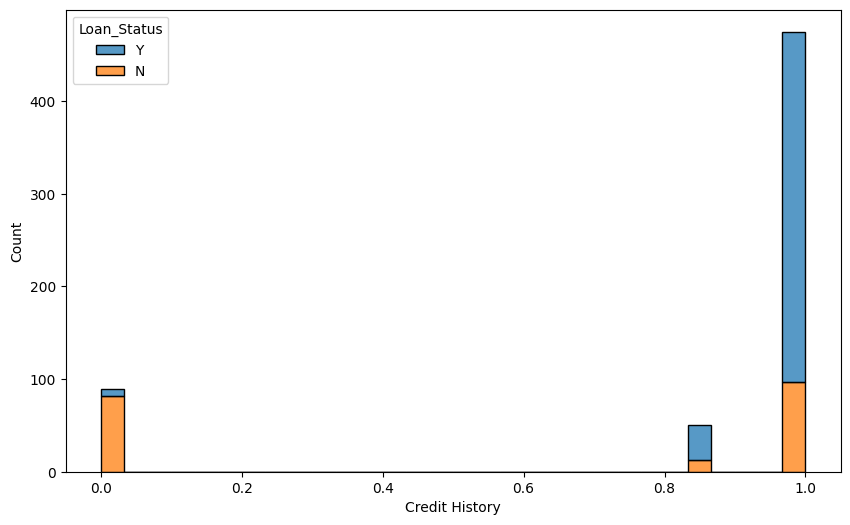

In [780]:
plt.figure(figsize=(10,6))
sns.histplot(x='Credit_History',hue='Loan_Status',multiple='stack',bins=30,data=train_df)
plt.xlabel('Credit History')
plt.show()

#### The chart tells us that
- Applicants having credit history between 0.8 to 1.0 have been granted loan
- Applicants in the range 0 to 0.2 have been rejected

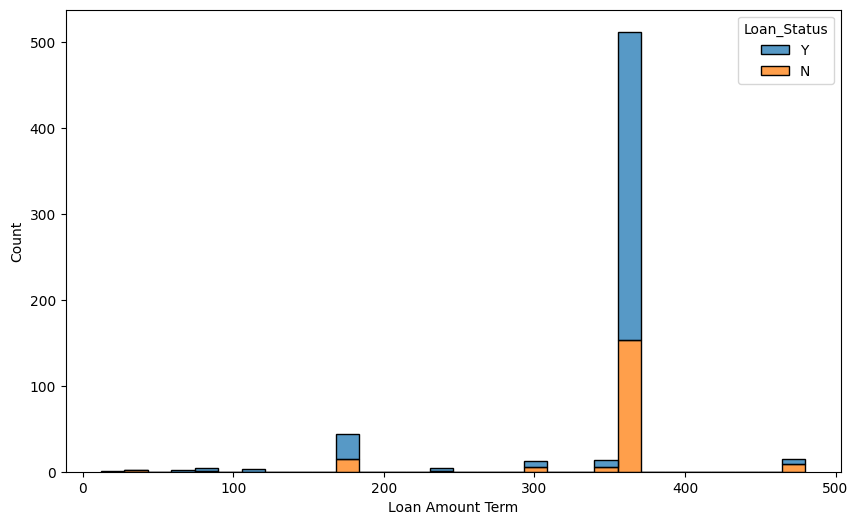

In [781]:
plt.figure(figsize=(10,6))
sns.histplot(x='Loan_Amount_Term',hue='Loan_Status',multiple='stack',bins=30,data=train_df)
plt.xlabel('Loan Amount Term')
plt.show()

In [782]:
train_df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,1.009623,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


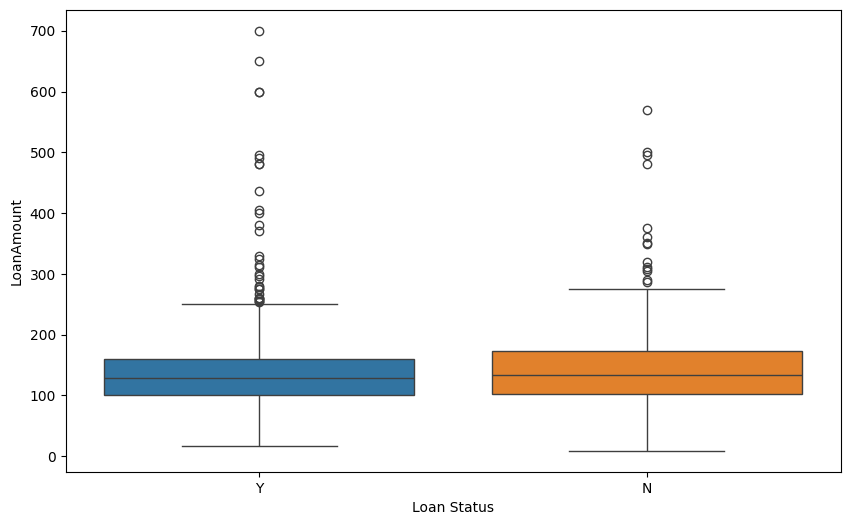

In [783]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Loan_Status',y='LoanAmount',hue='Loan_Status',data=train_df)
plt.xlabel('Loan Status')
plt.ylabel('LoanAmount')
plt.show()

In [784]:
Q1 = train_df['LoanAmount'].quantile(0.25)
Q3 = train_df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

train_df = train_df[(train_df['LoanAmount'] >= lower_limit) & (train_df['LoanAmount'] <= upper_limit)]

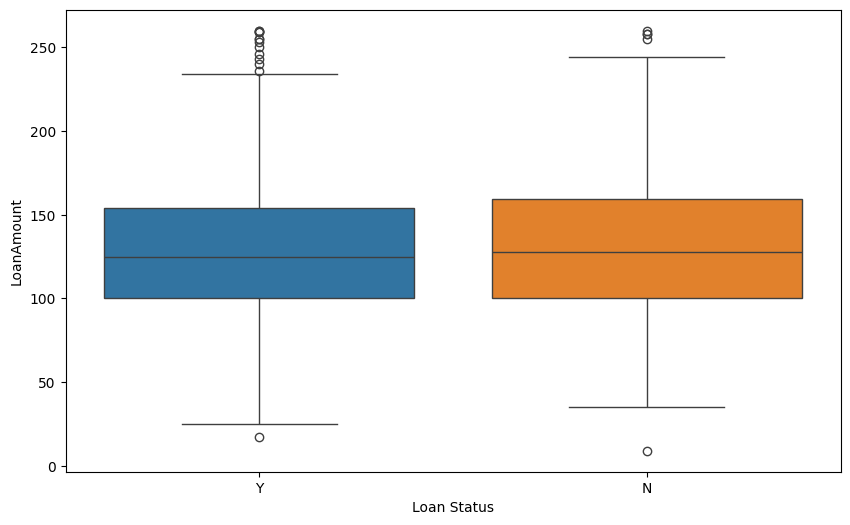

In [785]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Loan_Status',y='LoanAmount',hue='Loan_Status',data=train_df)
plt.xlabel('Loan Status')
plt.ylabel('LoanAmount')
plt.show()

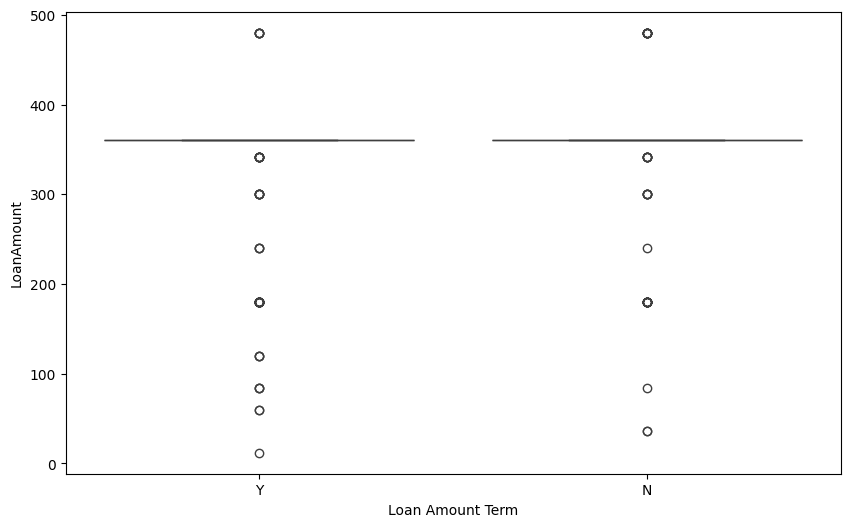

In [786]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Loan_Status',y='Loan_Amount_Term',hue='Loan_Status',data=train_df)
plt.xlabel('Loan Amount Term')
plt.ylabel('LoanAmount')
plt.show()

In [787]:
Q1 = train_df['Loan_Amount_Term'].quantile(0.25)
Q3 = train_df['Loan_Amount_Term'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

train_df = train_df[(train_df['Loan_Amount_Term'] >= lower_limit) & (train_df['Loan_Amount_Term'] <= upper_limit)]

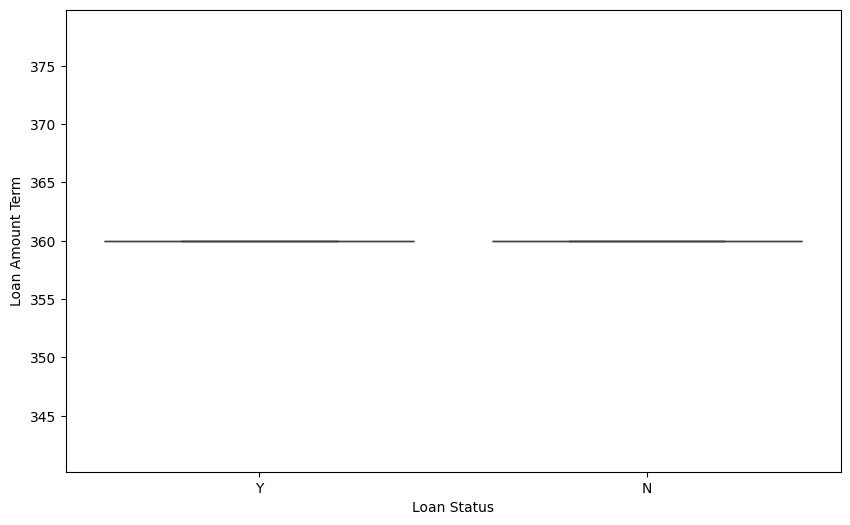

In [788]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Loan_Status',y='Loan_Amount_Term',hue='Loan_Status',data=train_df)
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Term')
plt.show()

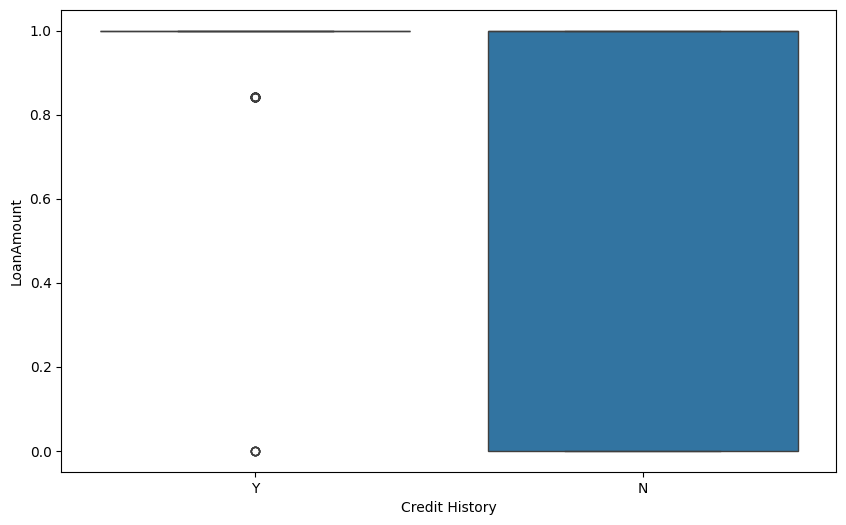

In [789]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Loan_Status',y='Credit_History',data=train_df)
plt.xlabel('Credit History')
plt.ylabel('LoanAmount')
plt.show()

In [790]:
Q1 = train_df['Credit_History'].quantile(0.25)
Q3 = train_df['Credit_History'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

train_df = train_df[(train_df['Credit_History'] >= lower_limit) & (train_df['Credit_History'] <= upper_limit)]

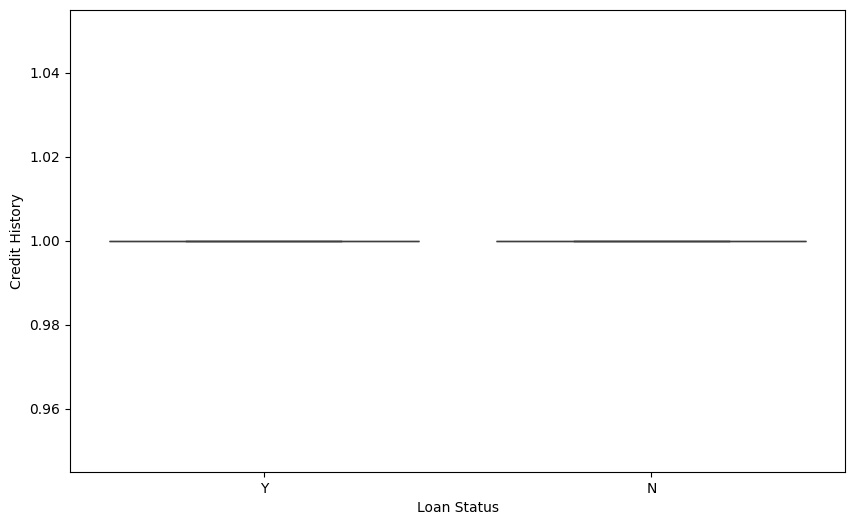

In [791]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Loan_Status',y='Credit_History',data=train_df)
plt.xlabel('Loan Status')
plt.ylabel('Credit History')
plt.show()

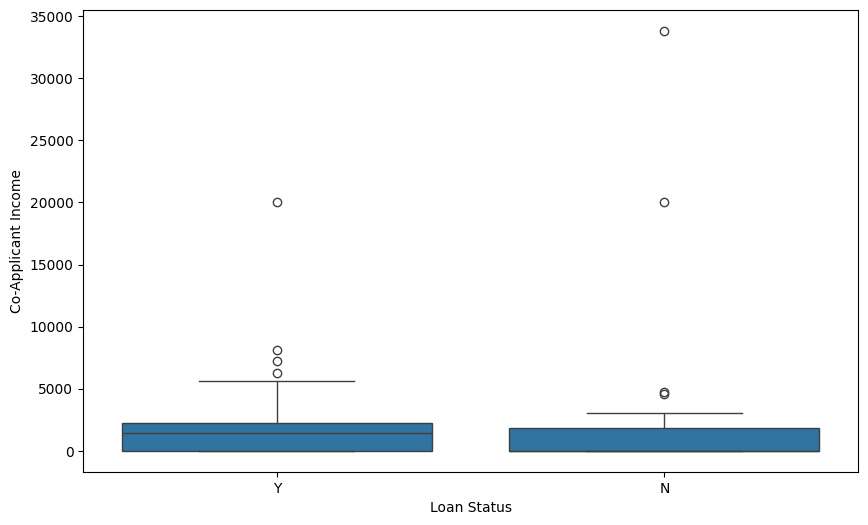

In [792]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=train_df)
plt.xlabel('Loan Status')
plt.ylabel('Co-Applicant Income')
plt.show()

In [793]:
Q1 = train_df['CoapplicantIncome'].quantile(0.25)
Q3 = train_df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

train_df = train_df[(train_df['CoapplicantIncome'] >= lower_limit) & (train_df['CoapplicantIncome'] <= upper_limit)]

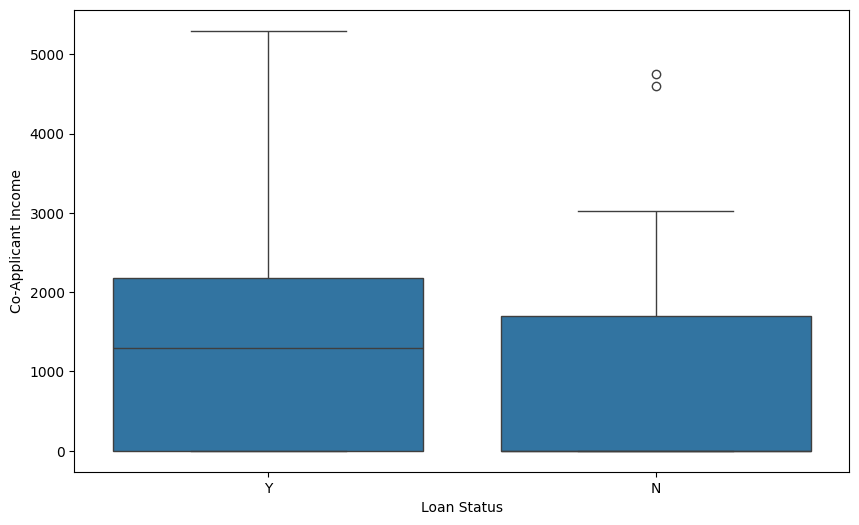

In [794]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=train_df)
plt.xlabel('Loan Status')
plt.ylabel('Co-Applicant Income')
plt.show()

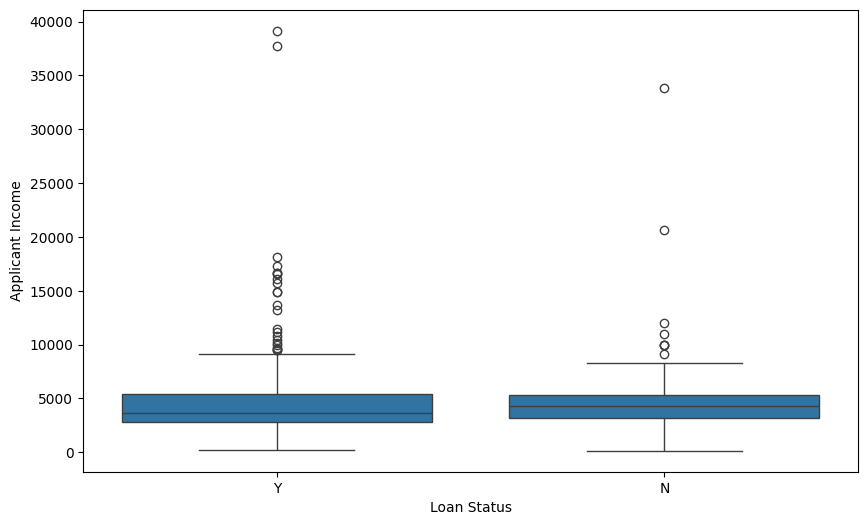

In [795]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=train_df)
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

In [796]:
Q1 = train_df['ApplicantIncome'].quantile(0.25)
Q3 = train_df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

train_df = train_df[(train_df['ApplicantIncome'] >= lower_limit) & (train_df['ApplicantIncome'] <= upper_limit)]

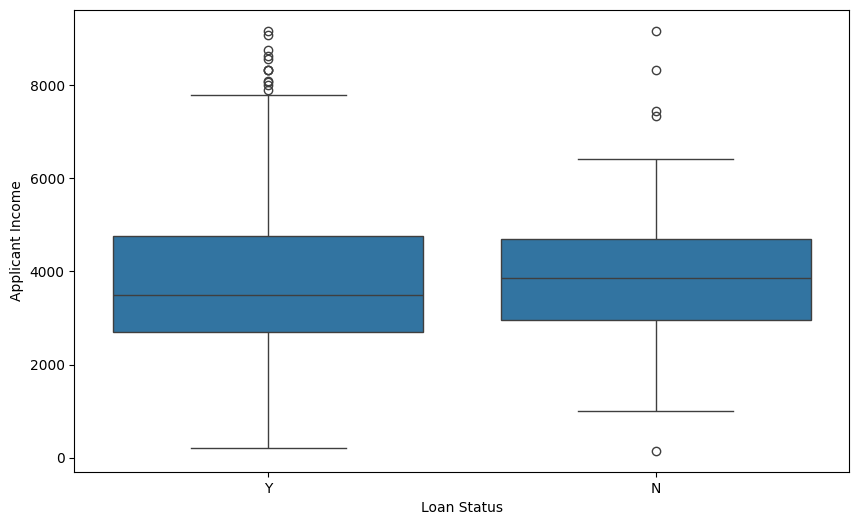

In [797]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=train_df)
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

In [798]:
train_df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,338.000000,338.000000,338.000000,338.000000,338.0,338.0
mean,0.689349,3928.136095,1296.553609,126.345994,360.0,1.0
std,0.975032,1679.090329,1323.306602,43.174321,0.0,0.0
min,0.000000,150.000000,0.000000,9.000000,360.0,1.0
25%,0.000000,2710.500000,0.000000,100.000000,360.0,1.0
50%,0.000000,3600.500000,1339.000000,125.000000,360.0,1.0
75%,1.000000,4719.250000,2167.000000,150.000000,360.0,1.0
max,3.000000,9167.000000,5296.000000,258.000000,360.0,1.0


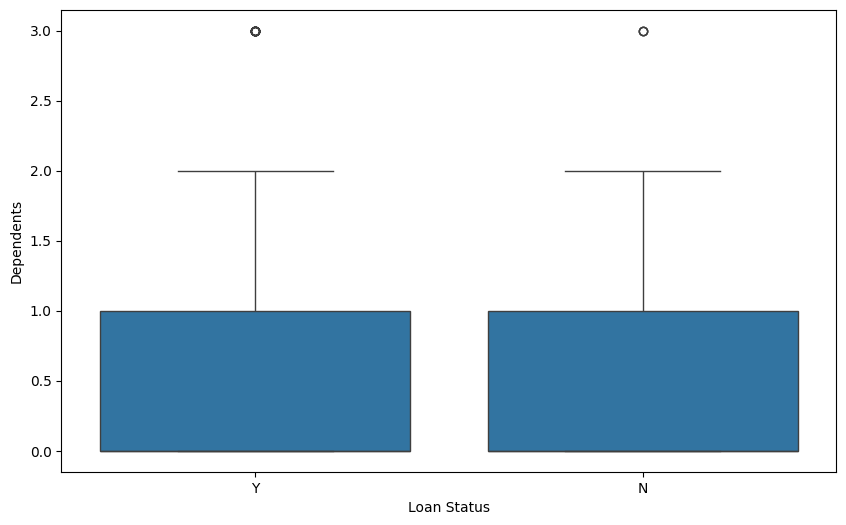

In [799]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Loan_Status',y='Dependents',data=train_df)
plt.xlabel('Loan Status')
plt.ylabel('Dependents')
plt.show()

In [800]:
Q1 = train_df['Dependents'].quantile(0.25)
Q3 = train_df['Dependents'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

train_df = train_df[(train_df['Dependents'] >= lower_limit) & (train_df['Dependents'] <= upper_limit)]

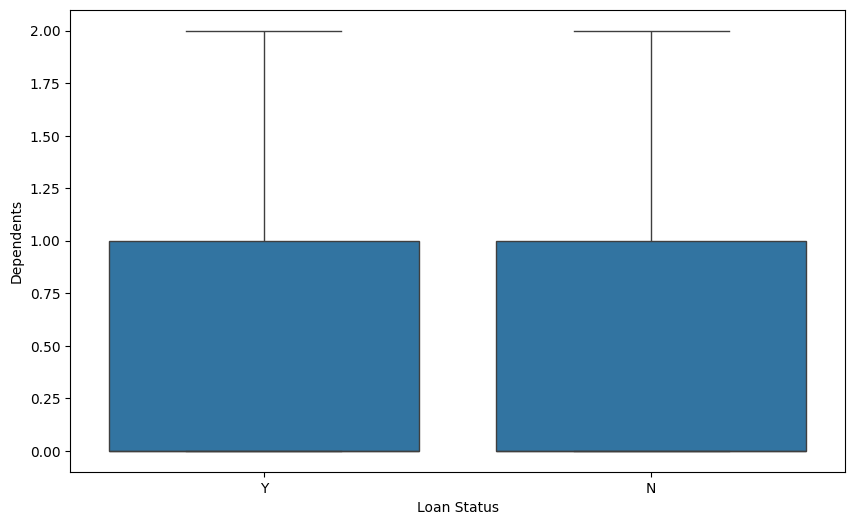

In [801]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Loan_Status',y='Dependents',data=train_df)
plt.xlabel('Loan Status')
plt.ylabel('Dependents')
plt.show()

In [802]:
train_df.shape

(316, 13)

In [803]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [804]:
test_df['Gender'].value_counts()

Gender
Male      286
Female     70
Name: count, dtype: int64

In [805]:
test_df['Gender'].replace(np.nan,'Male',inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_11520\3519865042.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Gender'].replace(np.nan,'Male',inplace=True)


In [806]:
avg_dependents = test_df['Dependents'].mean()
test_df['Dependents'].replace(np.nan,avg_dependents,inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_11520\303587243.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Dependents'].replace(np.nan,avg_dependents,inplace=True)


In [807]:
test_df['Self_Employed'].value_counts()

Self_Employed
No     307
Yes     37
Name: count, dtype: int64

In [808]:
test_df['Self_Employed'].replace(np.nan,'No',inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_11520\3240610449.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Self_Employed'].replace(np.nan,'No',inplace=True)


In [809]:
avg_term = test_df['Loan_Amount_Term'].mean()
test_df['Loan_Amount_Term'].replace(np.nan,avg_term,inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_11520\411380612.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Loan_Amount_Term'].replace(np.nan,avg_term,inplace=True)


In [810]:
avg_amount = test_df['LoanAmount'].mean()
test_df['LoanAmount'].replace(np.nan,avg_amount,inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_11520\3515182087.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['LoanAmount'].replace(np.nan,avg_amount,inplace=True)


In [811]:
avg_history = test_df['Credit_History'].mean()
test_df['Credit_History'].replace(np.nan,avg_history,inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_11520\4278426828.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Credit_History'].replace(np.nan,avg_history,inplace=True)


In [812]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [813]:
test_df.shape

(367, 12)

In [814]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    float64
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 34.5+ KB


In [815]:
test_df['Dependents'] = test_df['Dependents'].astype(int)

In [816]:
test_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [817]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [818]:
numeric_columns_train = train_df.select_dtypes(include=['int','float']).columns.tolist()
categorical_columns_train = train_df.select_dtypes(include=['object']).columns.tolist()
numeric_columns_test = test_df.select_dtypes(include=['int','float']).columns.tolist()
categorical_columns_test = test_df.select_dtypes(include=['object']).columns.tolist()

In [819]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
encoder = LabelEncoder()

In [820]:
numeric_columns_train

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [821]:
train_df['Dependents'] = scaler.fit_transform(train_df[['Dependents']])
train_df['ApplicantIncome'] = scaler.fit_transform(train_df[['ApplicantIncome']])
train_df['CoapplicantIncome'] = scaler.fit_transform(train_df[['CoapplicantIncome']])
train_df['LoanAmount'] = scaler.fit_transform(train_df[['LoanAmount']])
train_df['Loan_Amount_Term'] = scaler.fit_transform(train_df[['Loan_Amount_Term']])
train_df['Credit_History'] = scaler.fit_transform(train_df[['Credit_History']])

In [822]:
test_df['Dependents'] = scaler.fit_transform(test_df[['Dependents']])
test_df['ApplicantIncome'] = scaler.fit_transform(test_df[['ApplicantIncome']])
test_df['CoapplicantIncome'] = scaler.fit_transform(test_df[['CoapplicantIncome']])
test_df['LoanAmount'] = scaler.fit_transform(test_df[['LoanAmount']])
test_df['Loan_Amount_Term'] = scaler.fit_transform(test_df[['Loan_Amount_Term']])
test_df['Credit_History'] = scaler.fit_transform(test_df[['Credit_History']])

In [823]:
categorical_columns_train

['Loan_ID',
 'Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [824]:
train_df['Gender'] = encoder.fit_transform(train_df[['Gender']])
train_df['Married'] = encoder.fit_transform(train_df[['Married']])
train_df['Education'] = encoder.fit_transform(train_df[['Education']])
train_df['Self_Employed'] = encoder.fit_transform(train_df[['Self_Employed']])
train_df['Property_Area'] = encoder.fit_transform(train_df[['Property_Area']])
train_df['Loan_Status'] = encoder.fit_transform(train_df[['Loan_Status']])

C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site

In [825]:
test_df['Gender'] = encoder.fit_transform(test_df[['Gender']])
test_df['Married'] = encoder.fit_transform(test_df[['Married']])
test_df['Education'] = encoder.fit_transform(test_df[['Education']])
test_df['Self_Employed'] = encoder.fit_transform(test_df[['Self_Employed']])
test_df['Property_Area'] = encoder.fit_transform(test_df[['Property_Area']])

C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aldous Dsouza\OneDrive\Desktop\Data Science\datascience\Lib\site

In [826]:
train_df.drop('Loan_ID',inplace=True,axis=1)

In [827]:
test_df.drop('Loan_ID',axis=1,inplace=True)

In [828]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,-0.673196,0,0,1.192312,-0.999003,0.477940,0.0,0.0,2,1
1,1,1,0.600636,0,0,0.429259,0.147115,0.050543,0.0,0.0,0,0
2,1,1,-0.673196,0,1,-0.524860,-0.999003,-1.388646,0.0,0.0,2,1
3,1,1,-0.673196,1,0,-0.776197,0.793137,-0.135159,0.0,0.0,2,1
4,1,0,-0.673196,0,0,1.283324,-0.999003,0.352309,0.0,0.0,2,1


### Model Building

In [829]:
X = train_df.drop('Loan_Status',axis=1) #Feature variables
Y = train_df['Loan_Status'] #Target variable
X_test = test_df #Feature variables of test data

In [830]:
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold

In [831]:
train_df['Loan_Status'].value_counts()

Loan_Status
1    258
0     58
Name: count, dtype: int64

In [832]:
#Split the training and validation data
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)

In [833]:
from sklearn.ensemble import RandomForestClassifier

In [834]:
rg = RandomForestClassifier(random_state=42)

In [835]:
param_grid = {
    "n_estimators": [100, 200, 300],        
    "max_depth": [None, 5, 10, 20],         
    "min_samples_split": [2, 5, 10],        
    "min_samples_leaf": [1, 2, 4],          
    "max_features": ["sqrt", "log2"],       
    "bootstrap": [True, False]              
}

In [836]:
cv = StratifiedKFold(n_splits=3,shuffle=True)

In [855]:
model = GridSearchCV(estimator=rg,param_grid=param_grid,cv=cv,scoring='accuracy',verbose=2)

In [894]:
model.fit(X_train,Y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estim

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'bootstrap': [True, False], 'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [895]:
best_model = model.best_estimator_

In [896]:
model.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [897]:
model.best_score_

np.float64(0.8281500678760952)

In [898]:
model.score(X_val,Y_val)

0.7578947368421053

In [899]:
model.score(X_train,Y_train)

1.0

In [900]:
yhat = model.predict(X_val)

In [901]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [902]:
accuracy_score(Y_val,yhat)

0.7578947368421053

In [903]:
precision_score(Y_val,yhat)

0.8089887640449438

In [904]:
recall_score(Y_val,yhat)

0.9230769230769231

In [905]:
f1_score(Y_val,yhat)

0.8622754491017964

In [906]:
print(classification_report(Y_val,yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.81      0.92      0.86        78

    accuracy                           0.76        95
   macro avg       0.40      0.46      0.43        95
weighted avg       0.66      0.76      0.71        95



In [907]:
conf_matrix = confusion_matrix(Y_val,yhat)

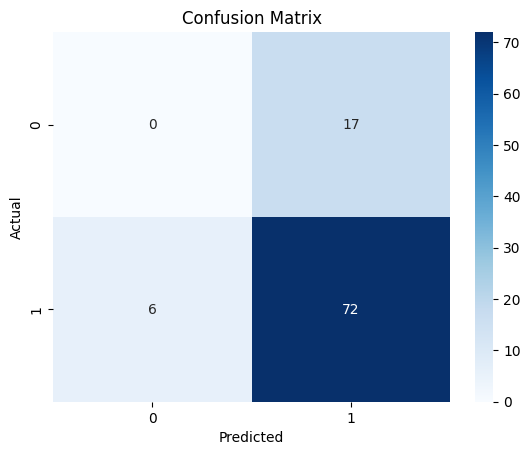

In [908]:
sns.heatmap(conf_matrix,annot=True,cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [909]:
yhat_pred = model.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Loan_Status


In [910]:
yhat_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [911]:
X_test.shape

(367, 12)

In [912]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,-0.758222,0,0,0.186461,-0.673335,-0.429368,0.270603,0.47918,2,1
1,1,1,0.181871,0,0,-0.352692,-0.029848,-0.166482,0.270603,0.47918,2,1
2,1,1,1.121964,0,0,0.039641,0.098849,1.180807,0.270603,0.47918,2,1
3,1,1,1.121964,0,0,-0.502774,0.418877,-0.593671,0.270603,0.00000,2,1
4,1,0,-0.758222,1,0,-0.311909,-0.673335,-0.955139,0.270603,0.47918,2,1


In [927]:
importances = best_model.feature_importances_

In [928]:
feat_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [929]:
feat_importances

,Feature,Importance
5,ApplicantIncome,0.305476
7,LoanAmount,0.253655
6,CoapplicantIncome,0.172229
10,Property_Area,0.086068
2,Dependents,0.057605
0,Gender,0.050279
1,Married,0.033190
3,Education,0.021830
4,Self_Employed,0.019668
8,Loan_Amount_Term,0.000000


In [915]:
predicted_df = pd.DataFrame({'Loan_ID':loan_id,'Loan_Status':yhat_pred})

In [916]:
predicted_df

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [918]:
predicted_df['Loan_Status'].replace({1:'Yes',0:'No'},inplace=True)

C:\Users\Aldous Dsouza\AppData\Local\Temp\ipykernel_11520\2923952479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  predicted_df['Loan_Status'].replace({1:'Yes',0:'No'},inplace=True)


In [920]:
predicted_df['Loan_Status'].value_counts()

Loan_Status
Yes    354
No      13
Name: count, dtype: int64

In [921]:
predicted_df.to_csv('predicted.csv',index=False)